<a href="https://colab.research.google.com/github/hypro2/LLM-Multimodal-Colab/blob/main/embedding/Meta_Llama_3_8B_llm2vec_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 트랜스포머
!pip install -U -q transformers

# 양자화
!pip install -U -q accelerate bitsandbytes
!pip install -U -q autoawq

# 임베딩
!pip install -q llm2vec
!pip install -q flash-attn --no-build-isolation

Acess Token 입력

https://huggingface.co/settings/tokens

In [2]:
import os
import getpass

os.environ["HF_TOKEN"] = getpass.getpass("HF_TOKEN:")

HF_TOKEN:··········


In [3]:
from llm2vec import LLM2Vec

import torch
from transformers import AutoTokenizer, AutoModel, AutoConfig
from peft import PeftModel


tokenizer = AutoTokenizer.from_pretrained(
    "WIPSAI/Llama-3-8B-Patent-Embedding"
)

config = AutoConfig.from_pretrained(
    "WIPSAI/Llama-3-8B-Patent-Embedding", trust_remote_code=True
)

model = AutoModel.from_pretrained(
    "WIPSAI/Llama-3-8B-Patent-Embedding",
    trust_remote_code=True,
    config=config,
    torch_dtype=torch.bfloat16,
    device_map="cuda" if torch.cuda.is_available() else "cpu",
    load_in_4bit=True,
)

# Wrapper for encoding and pooling operations
l2v = LLM2Vec(model, tokenizer, pooling_mode="mean", max_length=4096)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:81: UserWarning: 
Access to the secret `HF_TOKEN` has not been granted on this notebook.
You will not be requested again.
Please restart the session if you want to be prompted again.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/51.0k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.09M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/335 [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


config.json:   0%|          | 0.00/812 [00:00<?, ?B/s]

modeling_llama_encoder.py:   0%|          | 0.00/8.21k [00:00<?, ?B/s]

attn_mask_utils.py:   0%|          | 0.00/11.1k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/WIPSAI/Llama-3-8B-Patent-Embedding:
- attn_mask_utils.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
A new version of the following files was downloaded from https://huggingface.co/WIPSAI/Llama-3-8B-Patent-Embedding:
- modeling_llama_encoder.py
- attn_mask_utils.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


model.safetensors.index.json:   0%|          | 0.00/22.2k [00:00<?, ?B/s]

model-00001-of-00004.safetensors:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

model-00002-of-00004.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00003-of-00004.safetensors:   0%|          | 0.00/4.92G [00:00<?, ?B/s]

model-00004-of-00004.safetensors:   0%|          | 0.00/117M [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

In [4]:
# Encoding queries using instructions
instruction = (
    "Identify the topic or theme of the given patent:"
)
queries = [
    [instruction, "method for preparing polyolefin and polyolefin therefrom. purpose a manufacturing method of polyolefin is provided to able to provide polyolefin which is especially suitable for blow molding because of low polymer melt indexmi high polydispersitypdi and high full notch creep test to density or polymer melt index constitution a manufacturing method of polyolefin comprises a step of polymerizing olefin under the presence of a metallocene catalyst and a molecular weight controller the polymerization is conducted in a cascade-cstr reactor the cascade-cstr reactor comprises a first reactor a second reactor and a post reactor polyolefin is manufactured by the manufacturing method has multi-modal molecular weight distribution and has weight average molecular weight of 100000-700000. manufacturing method the chemical formula 1 cp1cp2mx2 in the chemical formula 1 the cp1 and cp2 are the ligand carrying the cyclopentadienyl group independently selected in the cyclopentadienyl group the cyclopentadienyl group substituted for the indenyl group the indenyl group substituted for the fluorenyl group and the fluorenyl group substituted for than m is the iv-element on the periodic table x is the halogen element the chemical formula 2 r1r2r3al of the polyolefin wherein the olefin is polymerized under the molecular weight control of the organometallic complex compound reacting the organoaluminium compound represented by formula 2 below and is manufactured and the cyclopentadienyl ligand compound indicated as the metallocene catalyst or less chemical formula 1 in the chemical formula 2 the r1 and the r2 and r3 are independently the c1c20 alkyl radical or halogen"],
    [instruction, "method for preparing metallocene catalyst. purpose provided are a metallocene catalyst which has a high polymerization activity to the polymerization of a large monomer such as cyclic olefin copolymers its preparation method a compound used in the method and a method for polymerizing an olefin by using the catalyst constitution the metallocene catalyst is represented by the formula 1 wherein m is a transition metal of group 4 r1 and r2 are independently a c1-c20 alkyl alkenyl alkylaryl or arylalkyl group an aryl group a c1-c20 alkyl or aryl group containing o or n or a metalloid of a metal of group 14 substituted with a hydrocarbyl group a is a cyclopentadienyl group unsubstituted or substituted with at least one alkyl or aryl group a fluorenyl group unsubstituted or substituted with at least one alkyl or aryl group an indenyl group unsubstituted or substituted with at least one alkyl or aryl group an amido group unsubstituted or substituted with at least one alkyl or aryl group or a substituted or unsubstituted phosphino group z is a bridge combining the cyclopentadienyl ligand comprising c1-c20 allylene diradical arylene diradical dialkyl silicon dialkyl germanium alkyl phosphine or amine with a by covalent bond and two qs are independently a halogen atom a c1-c20 alkyl alkenyl alkylaryl or arylalkyl group an aryl group a substituted or unsubstituted c1-c20 alkylidene group a substituted or unsubstituted amido group a substituted or unsubstituted c1-c20 alkoxy group or a phenoxy group. a with step of manufacturing the compound which is indicated as the chemical formula d to react with the organometallic compound selected from the group consisting of the compound indicated as the following chemical formula b and the compound indicated as the chemical formula c bthe manufacturing method of the metallocene catalyst including the step of manufacturing the compound which is indicated as the chemical formula 1 to react with the compound indicated as the following chemical formula e chemical formula 1 chemical formula a chemical formula b r2-m1 chemical formula c chemical formula d chemical formula e r2-mgx mq4 in the equation of the e and chemical formula 1 a b c d m is 4 family transition metal the m1 is the alkali metal x is the halogen atom the r1 and r2 are the metalloide radical of the alkyl of the carbon number 1 to 20 including each independently or simultaneously the alkyl of the carbon number 1 to 20 alkenyl the alkylaryl or the arylalkyl aryl and the oxygen atom or the nitrogen atom or the aryl or 14 family metal substituted as the hydrocarbyl a is the fluorenyl derivative indenyl derivative amido group substituted with the alkyl more than the substituted or non-substituted one or the aryl radical or the substituted or non-substituted phosphino group substituted with the indenyl one or more alkyls or the aryl radical substituted with the fluorenyl one or more alkyls or the aryl radical and z is the cyclopentadienyl ligand consisting of the allylene diradical arylene-dialkylene radical the dialkylsilcon dialkylgermanium alkylphosphine of the carbon number 1 20 or the amine and the bridge binding a with the covalent bond q is the alkoxy having with the alkyl of the halogen carbon number 1 to 20 the alkenyl and the substituent of the alkylidene substituted or non-substituted amido group carbon number 1 to 20 of the alkylaryl or the arylalkylaryl substituted or non-substituted the carbon number 1 to 20 or is not substituted or the phenoxy group"],
    [instruction, "carbazole derivatives and organic light emitting diode using the same. the present invention relates to a carbazole derivative which is represented by chemical formula 1 the present invention further relates to a coating composition containing the carbazole derivative an organic light-emitting device using the same and a method for producing the organic light-emitting device according to an embodiment of the present invention organic layers formed by using the carbazole derivative exhibit excellent thermal stability. the carbazol derivative indicated as below chemical formula 1 as to chemical formula 1 at least 1 or greater is the crosslinkable functional group among the y1 to the y4 with heat or light y and 1 through the y6 are different it the respectively is independently the crosslinkable functional group with hydrogen heat or light and l is the arylene radical of the substituted or non-substituted the carbon number 6 to 30 to the alkyl radical of the carbon number 1 to 20 and it is the same or it is identical or l more than 2 is different and it is identical"],
    [instruction, "heterocyclic compound and organic light emitting device comprising the same. the present specification relates to a heterocyclic compound of chemical formula 1 and an organic light emitting device comprising the same the heterocyclic compound according to an embodiment of the present specification can be used as a material of an organic material layer of the organic light emitting device and by using the same it is possible to improve efficiency low driving voltage and/or lifespan characteristics in the organic light emitting device. the heterocyclic compound indicated as below chemical formula 1 the a1 and a2 x is o or s in the chemical formula 1 may be identical or different and the independently the aryl radical of the alkyl radical of the aryl radical of the alkyl radical of the carbon number 1 to 10 or the carbon number 6 to 30 the substituted or non-substituted the carbazole group or the carbon number 1 to 10 or the carbon number 6 to 30 the substituted or non-substituted the indolocarbazole and l2 may be identical or different and the n is the plurality the m is the fixed number of 0 through 4 it is the am4 paste bn2 when the m is the plurality it is the same or - l1-a1 is different it the respectively is independently the direct coupling or the arylene radical and a is the fixed number of 0 through 4 and the n is the fixed number of 0 through 2 it is the b 0 through 2 and the and the r2 is hydrogen with r and 1"],
]
q_reps = l2v.encode(queries)


# Compute cosine similarity
q_reps_norm = torch.nn.functional.normalize(q_reps, p=2, dim=1)
cos_sim = torch.mm(q_reps_norm, q_reps_norm.transpose(0, 1))

print(cos_sim)

"""
tensor([[1.0000, 0.5856, 0.2609, 0.2942],
        [0.5856, 1.0000, 0.3723, 0.4077],
        [0.2609, 0.3723, 1.0000, 0.7366],
        [0.2942, 0.4077, 0.7366, 1.0000]])
"""


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

tensor([[1.0000, 0.5857, 0.2610, 0.2949],
        [0.5857, 1.0000, 0.3717, 0.4079],
        [0.2610, 0.3717, 1.0000, 0.7342],
        [0.2949, 0.4079, 0.7342, 1.0000]])


'\ntensor([[1.0000, 0.5856, 0.2609, 0.2942],\n        [0.5856, 1.0000, 0.3723, 0.4077],\n        [0.2609, 0.3723, 1.0000, 0.7366],\n        [0.2942, 0.4077, 0.7366, 1.0000]])\n'

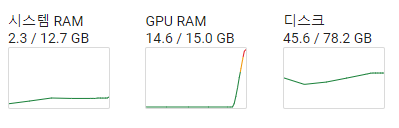